In [1]:
import pandas as pd
import seaborn as sns

In [10]:
tips = sns.load_dataset('tips')

titanic = pd.read_csv('train.csv')

flights = sns.load_dataset('flights')

iris = sns.load_dataset('iris')

In [17]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
127,14.52,2.00,Female,No,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4
231,15.69,3.00,Male,Yes,Sat,Dinner,3
234,15.53,3.00,Male,Yes,Sat,Dinner,2


In [16]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C


In [15]:
flights.sample(5)

,year,month,passengers
15,1950,Apr,135
33,1951,Oct,162
24,1951,Jan,145
12,1950,Jan,115
63,1954,Apr,227


In [14]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
1,4.9,3.0,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
136,6.3,3.4,5.6,2.4,virginica
8,4.4,2.9,1.4,0.2,setosa


### 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='tip', ylabel='total_bill'>

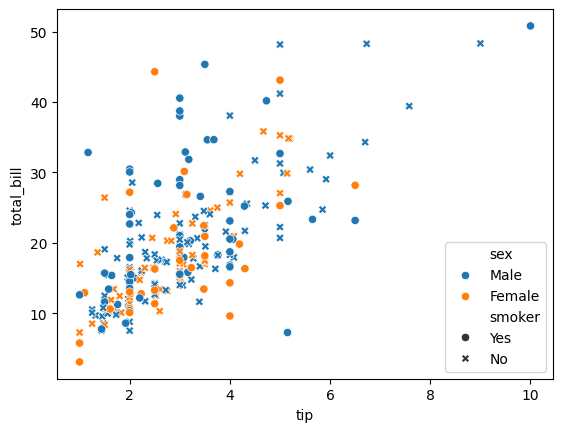

In [19]:
sns.scatterplot(x=tips['tip'],y=tips['total_bill'],hue=tips['sex'],style=tips['smoker'])

### 2. Bar Plot (Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Fare'>

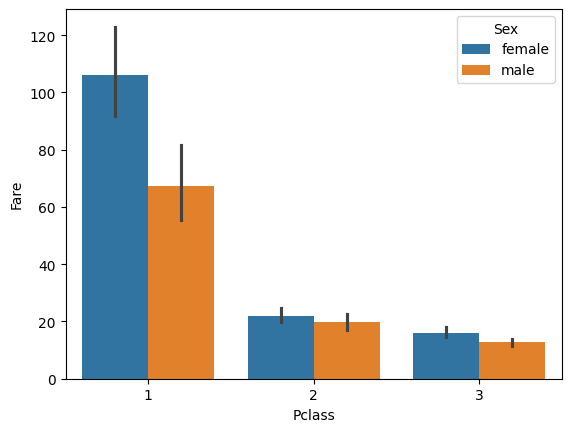

In [25]:
sns.barplot(x=titanic['Pclass'],y=titanic['Fare'],hue=titanic['Sex'])

### 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

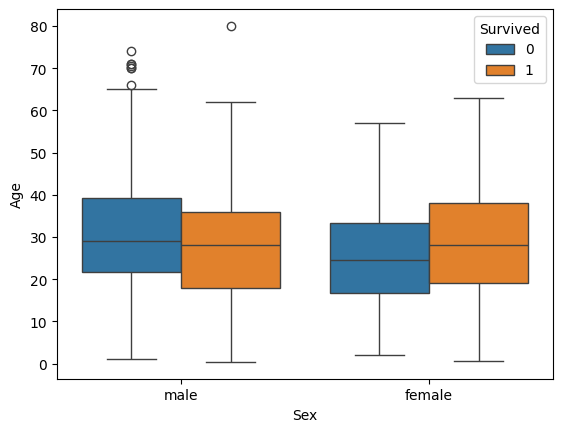

In [29]:
sns.boxplot(data=titanic, x='Sex', y='Age', hue='Survived')

### 4. Distplot (Numerical - Categorical)

<Axes: xlabel='Age', ylabel='Count'>

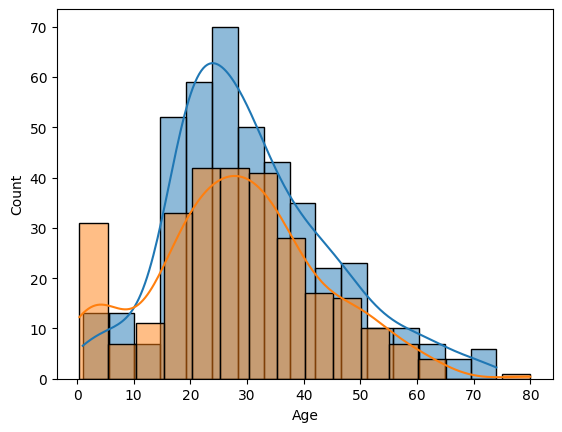

In [32]:
sns.histplot(titanic[titanic['Survived']==0]['Age'],kde=True)
sns.histplot(titanic[titanic['Survived']==1]['Age'],kde=True)

### 5. HeatMap (Categorical - Categorical)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


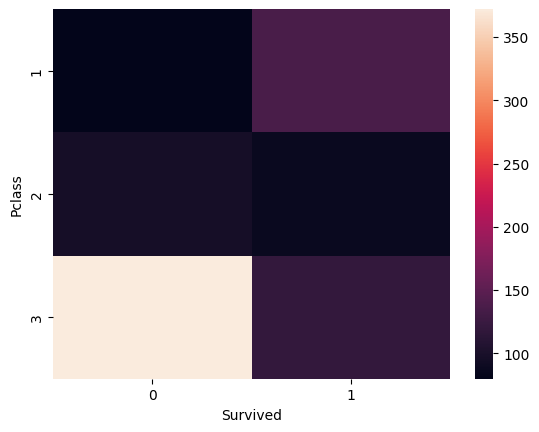

In [34]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))
pd.crosstab(titanic['Pclass'],titanic['Survived'])

### 6. Pairplot

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


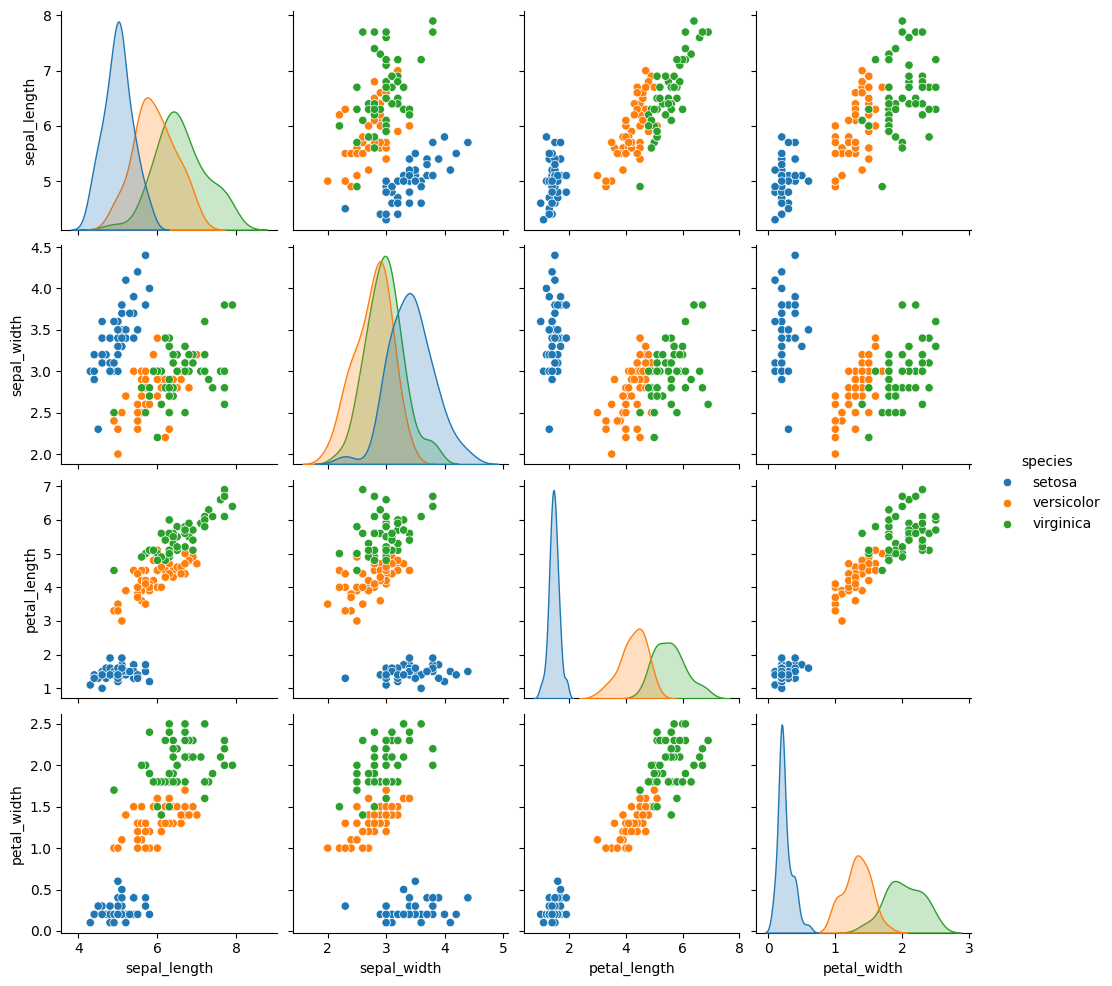

In [39]:
sns.pairplot(iris,hue='species')

### 7. Lineplot (Numerical - Numerical)

In [40]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

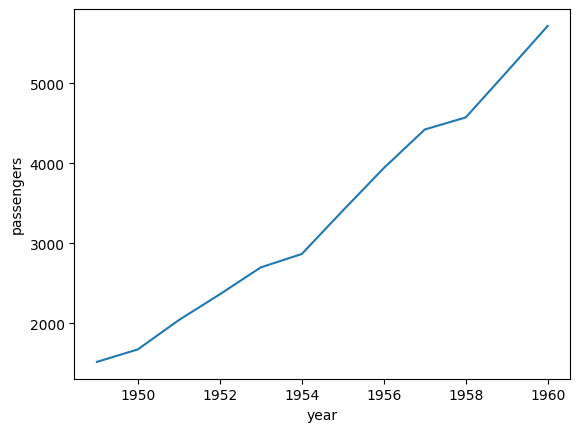

In [44]:
# aggregate numeric column 'passengers' by year (avoid summing categorical 'month')
new = flights.groupby('year', as_index=False)['passengers'].sum()
sns.lineplot(data=new, x='year', y='passengers')

In [45]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

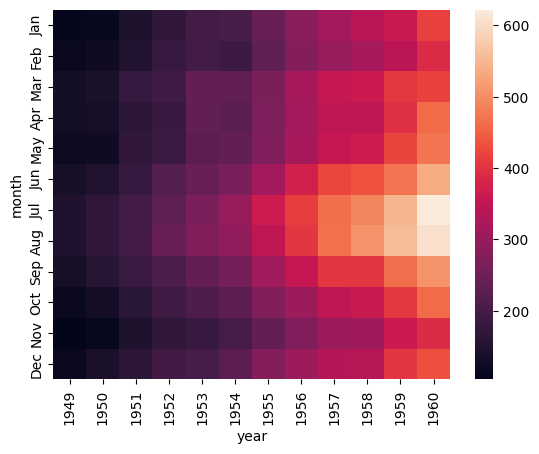

In [47]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))
